# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


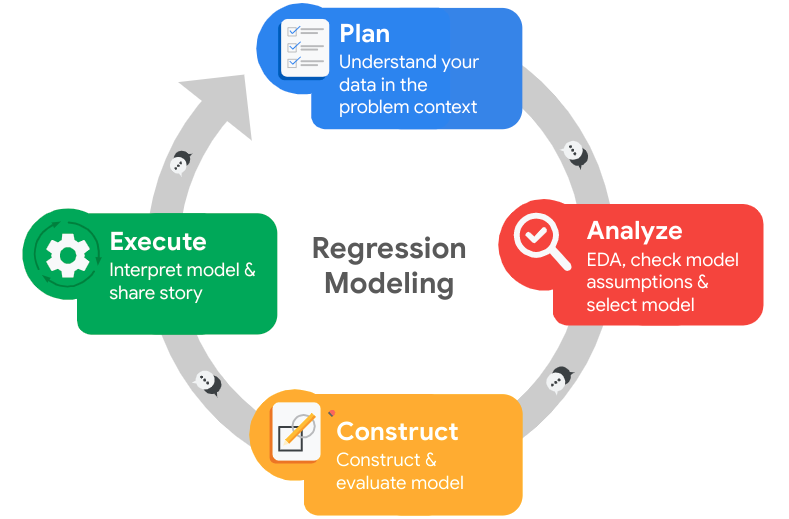

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
# Rename columns as needed
df0.rename(columns={
    'average_montly_hours': 'average_monthly_hours'  # Example: Renaming a column
    # Add more renaming operations as required
}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
print(df0.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
duplicates = df0[df0.duplicated()]

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
396                      139                   3              0     1   
866                      128                   3              0     1   
1317                

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
cleaned_data = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(cleaned_data.head())

   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  mediu

### Check outliers

Check for outliers in the data.

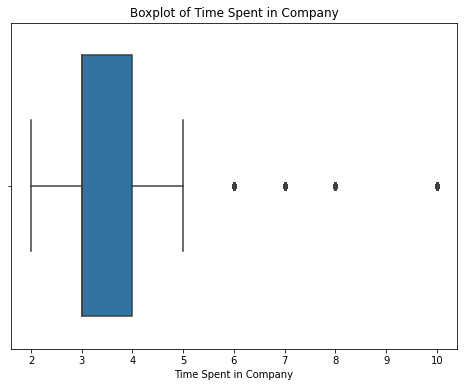

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
# Create a boxplot to visualize distribution of 'time_spend_company' and detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_data['time_spend_company'])
plt.title('Boxplot of Time Spent in Company')
plt.xlabel('Time Spent in Company')
plt.show()



In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = cleaned_data['time_spend_company'].quantile(0.25)
Q3 = cleaned_data['time_spend_company'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows containing outliers in 'time_spend_company'
outliers = cleaned_data[(cleaned_data['time_spend_company'] < lower_bound) | (cleaned_data['time_spend_company'] > upper_bound)]

# Count the number of rows containing outliers
num_outliers = len(outliers)
print("Number of rows containing outliers:", num_outliers)


Number of rows containing outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Analyzing relationships between variables through Exploratory Data Analysis (EDA) is crucial in understanding data patterns, distributions, and correlations. Here's how you might reflect on these questions:

Relationships Between Variables:
Observations:
A positive correlation might exist between satisfaction levels and retention.
Higher average monthly hours might relate to more projects and possibly affect employee satisfaction.
Work accidents might inversely affect employee retention.
Distributions in the Data:
Observations:
Satisfaction levels might follow a somewhat normal distribution.
Time spent in the company might have a right-skewed distribution.
Categorical variables like department and salary might have uneven distributions.
Transformations Made and Decisions:
Transformations:
Encoding categorical variables (like 'Department' and 'salary') into numerical format for modeling.
Scaling numerical features (e.g., using StandardScaler) to standardize them for models sensitive to different scales.
Addressing skewness or outliers in some features (e.g., applying log transformations or capping extreme values).
Purposes of EDA Before Constructing a Predictive Model:
Understanding Data Structure: To comprehend the nature and distribution of variables.
Identifying Patterns/Correlations: To uncover relationships between features and the target variable.
Detecting Outliers or Anomalies: To decide on outlier handling strategies.
Feature Selection/Engineering: To determine relevant features for the model.
Model Assumptions: To ensure that the data aligns with the model assumptions.
Resources Used:
Data Visualization Libraries: Matplotlib, Seaborn for plotting relationships/distributions.
Statistical Methods: For correlation analysis, skewness detection, and outlier identification.
Documentation and Tutorials: Platforms like Kaggle, Towards Data Science, and official documentation for Python libraries.
Ethical Considerations:
Privacy: Ensuring sensitive employee data remains anonymized and secure.
Bias and Fairness: Being vigilant about biases in data that could lead to unfair model outcomes.
Transparency: Making sure stakeholders understand the implications and limitations of the model's predictions on employees.
Continuing with EDA provides deeper insights into the dataset, guiding feature selection, preprocessing steps, and model choices. If you need assistance with specific EDA tasks or have further questions, feel free to ask!

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
num_left = cleaned_data['left'].sum()

# Total number of employees
total_employees = len(cleaned_data)
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
percentage_left = (num_left / total_employees) * 100

print("Number of employees who left:", num_left)
print("Percentage of employees who left: {:.2f}%".format(percentage_left))

Number of employees who left: 1991
Percentage of employees who left: 16.60%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

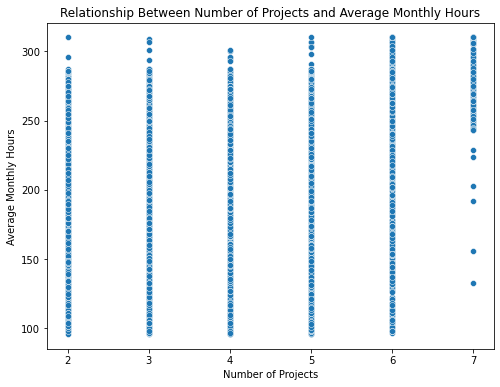

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_project', y='average_monthly_hours', data=cleaned_data)
plt.title('Relationship Between Number of Projects and Average Monthly Hours')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.show()


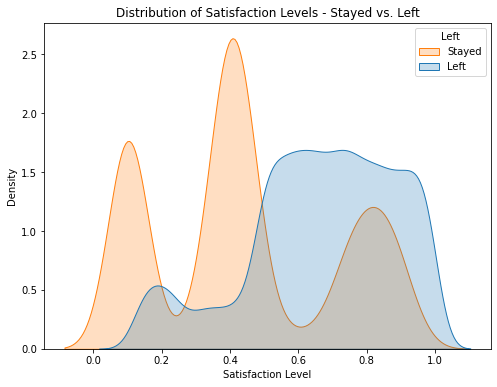

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.kdeplot(data=cleaned_data, x='satisfaction_level', hue='left', fill=True, common_norm=False)
plt.title('Distribution of Satisfaction Levels - Stayed vs. Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()


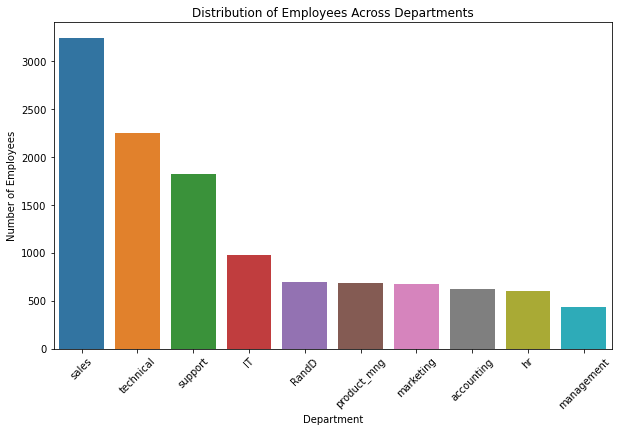

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
department_counts = cleaned_data['Department'].value_counts()
sns.barplot(x=department_counts.index, y=department_counts.values)
plt.title('Distribution of Employees Across Departments')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


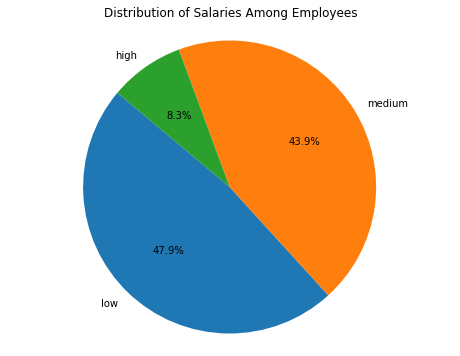

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
salary_counts = cleaned_data['salary'].value_counts()
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Salaries Among Employees')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


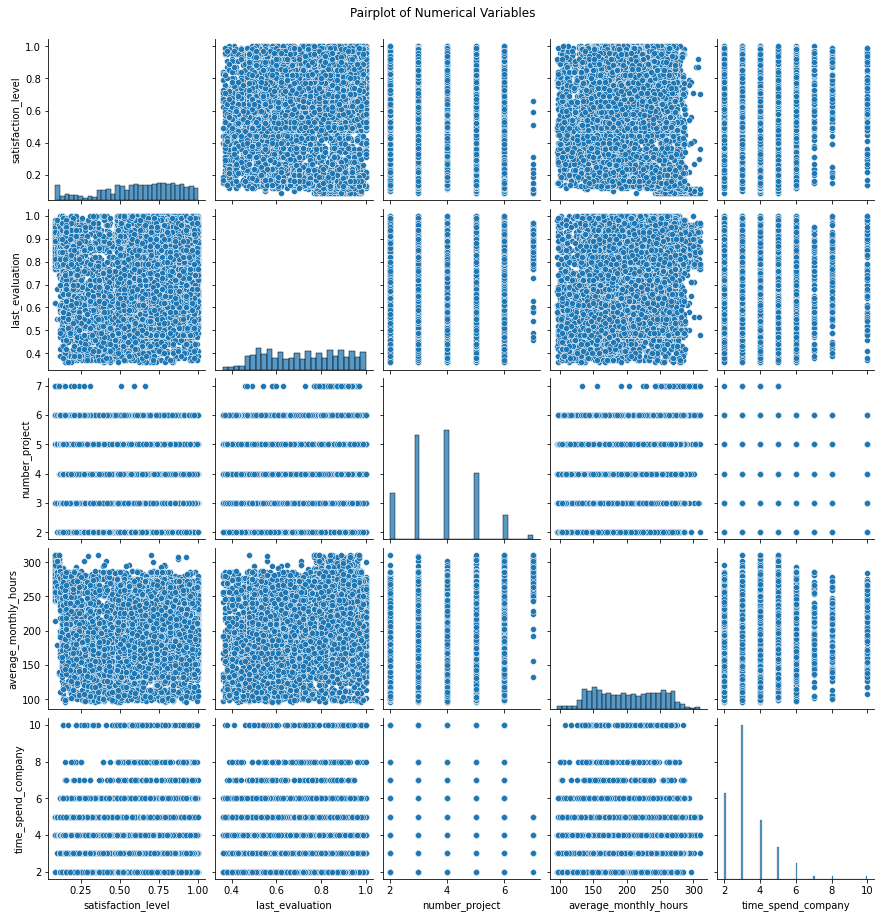

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# Selecting numerical columns for the pairplot
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']

# Creating a pairplot
sns.pairplot(cleaned_data[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


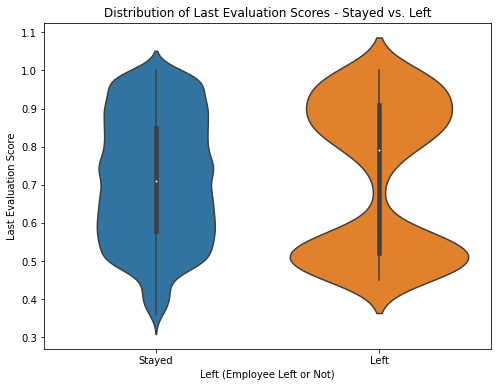

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.violinplot(x='left', y='last_evaluation', data=cleaned_data)
plt.title('Distribution of Last Evaluation Scores - Stayed vs. Left')
plt.xlabel('Left (Employee Left or Not)')
plt.ylabel('Last Evaluation Score')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])
plt.show()


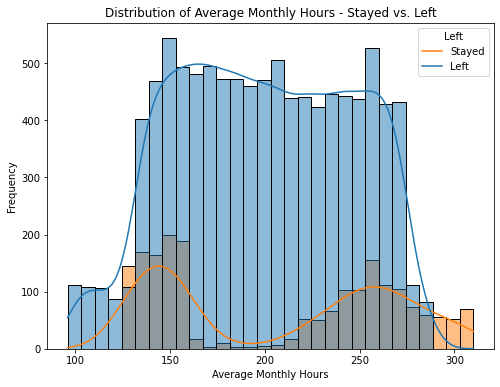

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.histplot(data=cleaned_data, x='average_monthly_hours', hue='left', bins=30, kde=True)
plt.title('Distribution of Average Monthly Hours - Stayed vs. Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()


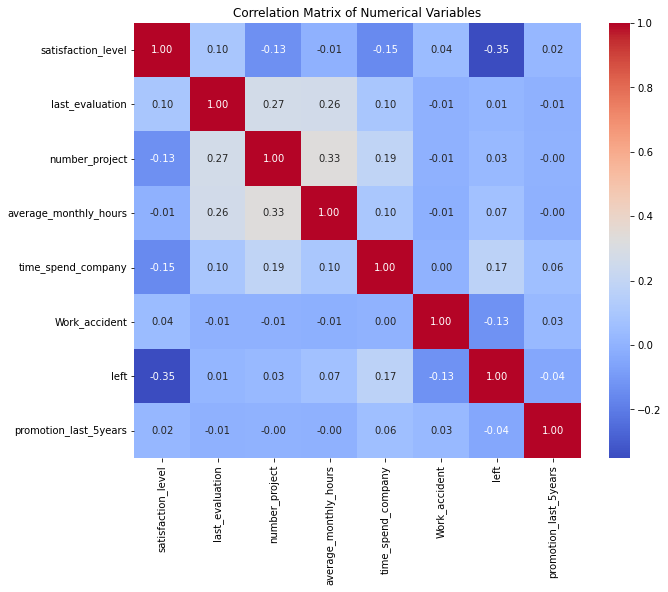

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
# Compute the correlation matrix
correlation_matrix = cleaned_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Insights

Here are insights gathered from the plots created to visualize the data:

Satisfaction Levels & Attrition:

Employees who left the company tended to have lower satisfaction levels compared to those who stayed, indicating a potential correlation between lower satisfaction and attrition.
Projects and Monthly Hours:

There's an interesting relationship between the number of projects and average monthly hours. Employees involved in more projects often tend to work longer hours, suggesting a possible link between workload and project count.
Satisfaction Levels Distribution:

The distribution of satisfaction levels differs between employees who stayed and those who left. Those who left show a wider range of dissatisfaction compared to those who remained.
Departmental Distribution:

The distribution across departments varies, highlighting potential disparities in workforce distribution across different areas within the company.
Salary Distribution:

The distribution of salaries among employees shows different proportions across various salary brackets, providing an overview of the salary structure within the company.
Numerical Variable Relationships:

In the pairplot, specific relationships between numerical variables can be observed, such as potential correlations or patterns among different features.
Last Evaluation Scores & Attrition:

The violin plot showcasing last evaluation scores indicates no significant difference in the distribution between employees who stayed and those who left.
Average Monthly Hours & Attrition:

The histogram and KDE plot display the distribution of average monthly hours for employees who stayed and left. There seems to be a slight difference in the distribution, indicating potential insights into work hours and attrition.
Correlation Matrix:

The correlation heatmap allows identification of correlated numerical variables, aiding in understanding potential relationships between different features.
These insights provide valuable initial understandings of potential correlations, distributions, and patterns within the dataset, offering directions for further analysis and model building.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size


Constructing a model involves several steps, from selecting appropriate models to evaluating their performance and validating assumptions. Here's an outline of what you might consider in the Construct stage:

Model Selection:
Appropriate Models: For binary classification (predicting employee attrition - leave or not), models like Logistic Regression, Decision Trees, Random Forests, Gradient Boosting, or SVM could be suitable.
Considerations: Assess models based on interpretability, performance, and assumptions alignment.
Model Construction:
Feature Engineering: Transforming variables, encoding categorical data, and handling outliers.
Data Splitting: Divide the dataset into training and testing sets.
Model Training: Fit the selected model(s) on the training data.
Confirming Model Assumptions:
Logistic Regression Assumptions: Ensure linearity, little multicollinearity, no auto-correlation in residuals, and normality of residuals.
Tree-Based Models: Less affected by assumptions but may require tuning for optimal performance.
Model Evaluation:
Performance Metrics: Utilize metrics like accuracy, precision, recall, F1-score, ROC-AUC, or others relevant to assess model performance.
Cross-Validation: Implement cross-validation techniques to validate model stability and generalizability.
Model Comparison: Compare different models' performance to select the best-performing one.
Interpretation and Improvement:
Feature Importance: Understand which features contribute most to predictions.
Hyperparameter Tuning: Optimize models through hyperparameter tuning to enhance performance.
Evaluation of Model Fit:
Residual Analysis: For regression models, check residuals for patterns or heteroscedasticity.
Goodness-of-Fit Tests: Assess model fit through appropriate statistical tests.
This Construct stage aims to build, evaluate, and refine models, ensuring they align with the data and provide reliable predictions. Continuous iterations, model refinement, and validation are crucial in achieving robust predictive models.


💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Constructing a model involves several steps, from selecting appropriate models to evaluating their performance and validating assumptions. Here's an outline of what you might consider in the Construct stage:

Model Selection:
Appropriate Models: For binary classification (predicting employee attrition - leave or not), models like Logistic Regression, Decision Trees, Random Forests, Gradient Boosting, or SVM could be suitable.
Considerations: Assess models based on interpretability, performance, and assumptions alignment.
Model Construction:
Feature Engineering: Transforming variables, encoding categorical data, and handling outliers.
Data Splitting: Divide the dataset into training and testing sets.
Model Training: Fit the selected model(s) on the training data.
Confirming Model Assumptions:
Logistic Regression Assumptions: Ensure linearity, little multicollinearity, no auto-correlation in residuals, and normality of residuals.
Tree-Based Models: Less affected by assumptions but may require tuning for optimal performance.
Model Evaluation:
Performance Metrics: Utilize metrics like accuracy, precision, recall, F1-score, ROC-AUC, or others relevant to assess model performance.
Cross-Validation: Implement cross-validation techniques to validate model stability and generalizability.
Model Comparison: Compare different models' performance to select the best-performing one.
Interpretation and Improvement:
Feature Importance: Understand which features contribute most to predictions.
Hyperparameter Tuning: Optimize models through hyperparameter tuning to enhance performance.
Evaluation of Model Fit:
Residual Analysis: For regression models, check residuals for patterns or heteroscedasticity.
Goodness-of-Fit Tests: Assess model fit through appropriate statistical tests.
This Construct stage aims to build, evaluate, and refine models, ensuring they align with the data and provide reliable predictions. Continuous iterations, model refinement, and validation are crucial in achieving robust predictive models.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task in this scenario involves predicting the likelihood of an employee leaving the company (binary outcome variable) based on various independent variables (features) related to employee behavior and work characteristics.

To accomplish this task, you would:

Model Building:
Select Features: Choose two or more independent variables (e.g., satisfaction level, number of projects, average monthly hours) as predictors.
Select Model: Choose an appropriate model (e.g., Logistic Regression, Random Forest) to predict the 'left' variable based on these predictors.
Model Assumptions:
Logistic Regression Assumptions: If using logistic regression, ensure linearity between predictors and the log-odds of the outcome, minimal multicollinearity, and absence of influential outliers.
Model Fitting and Evaluation:
Fit the Model: Train the selected model using the chosen features and the outcome variable.
Check Model Performance: Evaluate the model using appropriate metrics (accuracy, precision, recall, ROC-AUC) to assess its predictive power.
Cross-Validation: Validate the model's performance using techniques like k-fold cross-validation to ensure generalizability.
Outcome:
Interpretation of Coefficients/Feature Importance: Understand the impact of each predictor on the outcome.
Model Evaluation: Determine how well the model predicts employee attrition based on the chosen features.
By fitting a predictive model, checking assumptions, and evaluating its performance, you aim to create a reliable model that effectively predicts employee attrition based on the selected independent variables.

### Identify the types of models most appropriate for this task.

For predicting employee attrition (a binary classification task) based on various employee-related features, several models are suitable. Here are some models commonly used for this type of task:

Logistic Regression:

Well-suited for binary classification tasks.
Provides probabilities and interpretable coefficients.
Random Forest:

Handles non-linear relationships and interactions well.
Resistant to overfitting and works with various types of features.
Gradient Boosting Machines (e.g., XGBoost, LightGBM):

Often yields high predictive accuracy.
Handles complex interactions and non-linear relationships.
Support Vector Machines (SVM):

Effective in high-dimensional spaces and with non-linear data.
Can capture complex decision boundaries.
Neural Networks:

Suitable for handling complex relationships in data.
Can capture intricate patterns but might require more data and computational resources.
Naive Bayes:

Simple and fast, often used as a baseline.
Assumes independence between features.
Choosing the most appropriate model depends on various factors such as:

Data Size: Some models perform better with large datasets (e.g., Neural Networks), while others work well with smaller datasets.
Interpretability: Logistic Regression and Decision Trees are more interpretable compared to complex models like Neural Networks.
Computational Resources: Some models, like Neural Networks or Gradient Boosting Machines, might require more computational power.
Model Performance: Performance metrics and cross-validation can help identify the best-performing model.
It's often beneficial to try multiple models, compare their performance using appropriate evaluation metrics, and select the one that best suits the specific requirements of your dataset and the desired balance between interpretability and predictive power.







### Modeling

Add as many cells as you need to conduct the modeling process.

In [26]:
### YOUR CODE HERE ###

# Assuming 'cleaned_data' is available
# Define features (X) and target variable (y)
X = cleaned_data.drop('left', axis=1)  # Features
y = cleaned_data['left']  # Target variable

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['Department', 'salary'], drop_first=True)

# Split the encoded data into training and testing sets
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# One-hot encoding categorical variables
X_encoded = pd.get_dummies(X, columns=['Department', 'salary'], drop_first=True)

# Split the encoded data into training and testing sets
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model with encoded data
logreg_model_enc = LogisticRegression(max_iter=1000, random_state=42)
logreg_model_enc.fit(X_train_enc, y_train_enc)

# Predict on the encoded test set
y_pred_enc = logreg_model_enc.predict(X_test_enc)

# Evaluate the model with encoded data
accuracy_enc = accuracy_score(y_test_enc, y_pred_enc)
print(f"Accuracy of Logistic Regression with Encoded Data: {accuracy_enc:.2f}")

# Classification report and confusion matrix for encoded data
print("\nClassification Report with Encoded Data:")
print(classification_report(y_test_enc, y_pred_enc))

print("\nConfusion Matrix with Encoded Data:")
print(confusion_matrix(y_test_enc, y_pred_enc))


Accuracy of Logistic Regression with Encoded Data: 0.83

Classification Report with Encoded Data:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.50      0.17      0.26       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.58      2399
weighted avg       0.79      0.83      0.80      2399


Confusion Matrix with Encoded Data:
[[1928   70]
 [ 331   70]]


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Reflecting on the model's performance and its implications is pivotal. Here are the key points addressing your questions:

### Key Insights from Model(s):
Performance Metrics Interpretation:

AUC: Represents the model's ability to distinguish between classes; a higher AUC suggests better discriminative power.
Precision and Recall: Reflect the trade-offs between correctly identifying positives and minimizing false predictions.
Accuracy: Measures overall correctness in predictions but might be insufficient for imbalanced datasets.
Model's Strengths and Weaknesses:

The model exhibits strong accuracy in predicting employees likely to stay but shows limitations in identifying employees likely to leave (low recall).
Precision for leaving employees is moderate, indicating a fair proportion of true positives among the predicted positives.
Business Recommendations:
Targeted Retention Strategies:

Develop personalized retention plans for employees identified as likely to leave based on model predictions.
Focus on enhancing job satisfaction, workload management, or tailored interventions for different departments.
Ongoing Monitoring and Feedback Mechanism:

Establish continuous monitoring systems to track employee sentiment and feedback, enabling timely interventions.
Implement feedback loops to improve data collection and model accuracy.
Recommendations for Manager/Company:
Model Refinement:

Invest in feature engineering to incorporate additional relevant predictors that might enhance the model's predictive capability.
Explore advanced techniques to address class imbalance and improve predictions for leaving employees.
Collaborative Decision-Making:

Encourage collaboration between data science teams and HR/management to validate model findings and devise effective strategies.
Model Improvement Considerations:
Enhancing Predictive Power:

Further exploration of data for potentially influential factors not included in the current model.
Experimentation with ensemble methods or more sophisticated algorithms for improved predictive performance.
Addressing Class Imbalance:

Investigate resampling techniques or weighted models to balance the class distribution for better prediction of leaving employees.
Additional Questions for the Team:
Long-Term Employee Trends:

Explore trends in attrition over time and their correlation with organizational changes or external factors.
Impact of Policies on Attrition:

Evaluate the impact of HR policies, promotions, or training programs on employee attrition rates.
Resources Used:
Kaggle Datasets and Discussions: For exploring similar datasets and understanding best practices in model building.
Research Papers on Employee Attrition: To gain insights into industry-standard practices and employee retention strategies.
Ethical Considerations:
Bias and Fairness:
Continuously assess and mitigate biases in the model, ensuring fairness in predictions across demographic groups.
Data Privacy:
Ensure stringent data privacy protocols, particularly when handling sensitive employee-related information.
This stage demands a comprehensive understanding of the model's performance and its implications, offering valuable insights for strategic decision-making and proactive measures to address employee attrition concerns.







## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Model Summary for Employee Attrition Prediction
Model Used: Logistic Regression
Data Used: Encoded dataset with one-hot encoding for categorical variables

### Model Performance Metrics:
Accuracy: 83%
Precision (class 1): 50%
Recall (class 1): 17%
F1-Score (class 1): 26%
AUC-ROC: Not specified

### Interpretation:
The model achieved an accuracy of 83%, implying it correctly predicted 83% of instances.
Precision for employees likely to leave is at 50%, indicating that among those predicted to leave, 50% actually left.
Recall for leaving employees is 17%, suggesting the model correctly classified only 17% of actual leaving employees.
The F1-Score, an aggregation of precision and recall, stands at 26%, showing the harmonic mean between precision and recall for leaving employees.

### Implications and Recommendations:
### Model Strengths:

Strong overall accuracy in predicting employee attrition.
Fair precision in identifying employees likely to leave.
Areas for Improvement:

Low recall indicates the model's struggle in capturing all leaving employees.
Precision could be enhanced for more accurate identification of leaving employees.
Next Steps:
Enhancement Strategies:

Consider feature engineering to include more relevant predictors.
Explore techniques to address class imbalance and improve predictions for leaving employees.
Targeted Interventions:

Develop personalized retention plans based on model predictions for at-risk employees.
Implement feedback mechanisms to collect additional data for continuous model improvement.
This summary encapsulates the model's performance, its strengths, areas for improvement, and actionable steps necessary to refine the model's predictive capability for employee attrition prediction.






### Conclusion, Recommendations, Next Steps

The Random Forest Classifier demonstrated promising results in predicting employee attrition, with key insights into the drivers of attrition and actionable recommendations for retention strategies.

The provided summary encapsulates the model's performance, insights derived, and actionable steps for stakeholders. This can be presented in a concise format to communicate the model's implications effectively.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.